In [2]:
%load_ext autoreload

%matplotlib ipympl

import adjustText
import datetime
# import ete3
import itertools
import json
import logging
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import subprocess
import typing
# import re
import xml.etree.ElementTree as ET
# import xml.dom.minidom
# import xmlschema

In [3]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
# from maxes.xes_file import XesFile
# from maxes.analyze_xes import AnalyzeXes
# import maxes.analyze_sequence
# import maxes.serialization.serialize
# import maxes.graphs
import maxes.notebooks.utils
import maxes.utils

In [ ]:
maxes.notebooks.utils.init_notebook() # RUN ONLY ONCE

In [25]:
manifest = [
    # {
    #     "key": "photo_copier",
    #     "title": "Artificial Digital Photo Copier Event Log",
    #     "pageUrl": "https://data.4tu.nl/datasets/c8ae67a9-13de-445b-8086-2655afc0c1db",

    #     "files": [
    #         {
    #             "key": "data",
    #             "url": "https://data.4tu.nl/file/c8ae67a9-13de-445b-8086-2655afc0c1db/87aa13ed-6ebc-46b5-8b1e-b13fd0d23f69",
    #             "destination": "event-log.xes.gz"
    #         }
    #     ],

    #     "process": [
    #         {
    #             "step": "gzip",
    #             "source": "event-log.xes.gz",
    #             "destination": "event-log.xes"
    #         }
    #     ],

    #     "result_files": [
    #         {
    #             "key": "data",
    #             "path": "event-log.xes"
    #         }
    #     ]
    # },

    # {
    #     "key": "synthetic_with_performance_characteristics",
    #     "title": "Synthetic event log with specific process performance characteristics",
    #     "pageUrl": "",

    #     "files": [
    #         {
    #             "key": "event_log",
    #             "url": "https://data.4tu.nl/file/670bf51b-cb96-4c80-9c20-caff31b2f568/3fe0c66f-2d18-4f48-81ab-6efba707973f",
    #             "destination": "event_log.xes"
    #         },
    #         {
    #             "key": "event_log_lifecycle_moves",
    #             "url": "https://data.4tu.nl/file/670bf51b-cb96-4c80-9c20-caff31b2f568/bbcb2ba0-4e61-4120-a0ff-d72f8a7a9cd3",
    #             "destination": "event_log_lifecycle_moves.xes"
    #         }
    #     ],

    #     "result_files": [
    #         {
    #             "key": "event_log",
    #             "destination": "event_log.xes"
    #         },
    #         {
    #             "key": "event_log_lifecycle_moves",
    #             "destination": "event_log_lifecycle_moves.xes"
    #         }
    #     ]
    # },

    # {
    #     "key": "pdc2023",
    #     "title": "Process Discovery Contest 2023",
    #     "pageUrl": "https://data.4tu.nl/datasets/afd6f608-469e-48f9-977d-875b45840d39/1",

    #     "files": [
    #         {
    #             "key": "base_logs",
    #             "url": "https://data.4tu.nl/file/afd6f608-469e-48f9-977d-875b45840d39/17cf3540-27b9-4525-a5e8-626de4faa627",
    #             "destination": "base_logs.zip",
    #         },

    #         {
    #             "key": "ground_truth_logs",
    #             "url": "https://data.4tu.nl/file/afd6f608-469e-48f9-977d-875b45840d39/0e3065bd-5e8d-48f7-8548-b490d3ef80bb",
    #             "destination": "ground_truth_logs.zip",
    #         },

    #         {
    #             "key": "models",
    #             "url": "https://data.4tu.nl/file/afd6f608-469e-48f9-977d-875b45840d39/e8eaeb15-b503-443c-8666-43f3c5261eb2",
    #             "destination": "models.zip",
    #         },

    #         {
    #             "key": "test_logs",
    #             "url": "https://data.4tu.nl/file/afd6f608-469e-48f9-977d-875b45840d39/de946a9a-727e-4eed-b0e5-0ca2393d54aa",
    #             "destination": "test_logs.zip",
    #         },

    #         {
    #             "key": "training_logs",
    #             "url": "https://data.4tu.nl/file/afd6f608-469e-48f9-977d-875b45840d39/acbc2e6d-6182-4a3a-84b5-282a28022228",
    #             "destination": "training_logs.zip",
    #         }
    #     ],

    #     "process": [
    #         {
    #             "step": "zip",
    #             "source": "base_logs.zip",
    #             "destination": "base_logs"
    #         },
    #         {
    #             "step": "zip",
    #             "source": "ground_truth_logs.zip",
    #             "destination": "ground_truth_logs"
    #         },
    #         {
    #             "step": "zip",
    #             "source": "models.zip",
    #             "destination": "models"
    #         },
    #         {
    #             "step": "zip",
    #             "source": "test_logs.zip",
    #             "destination": "test_logs"
    #         },
    #         {
    #             "step": "zip",
    #             "source": "training_logs.zip",
    #             "destination": "training_logs"
    #         }
    #     ]
    # },

    # {
    #     "key": "env_permit_application_process",
    #     "title": "Receipt phase of an environmental permit application process (WABO), CoSeLoG project",
    #     "pageUrl": "https://data.4tu.nl/datasets/2db2e3c1-9499-4699-9098-1a28c15a5913/2",

    #     "files": [
    #         {
    #             "key": "event_log",
    #             "url": "https://data.4tu.nl/file/2db2e3c1-9499-4699-9098-1a28c15a5913/21758246-61e7-4019-bf7d-fb6a9b38df14",
    #             "destination": "event_log.xes.gz"
    #         }
    #     ],

    #     "process": [
    #         {
    #             "step": "gzip",
    #             "source": "event_log.xes.gz",
    #             "destination": "event_log.xes"
    #         }
    #     ],

    #     "result_files": [
    #         {
    #             "key": "data",
    #             "path": "event_log.xes"
    #         }
    #     ]
    # },

    # {
    #     "key": "job_shop_scheduling",
    #     "title": "An agent-based process mining architecture for emergent behavior analysis",
    #     "pageUrl": "https://data.4tu.nl/datasets/29fee175-d665-4412-b3c8-d7e553ea1b73/2",

    #     "files": [
    #         {
    #             "key": "filtered_files",
    #             "url": "https://data.4tu.nl/file/29fee175-d665-4412-b3c8-d7e553ea1b73/c97251ff-7da3-4936-8933-72fb223b5473",
    #             "destination": "filtered_files.zip"
    #         }
    #     ],

    #     "process": [
    #         {
    #             "step": "zip",
    #             "source": "filtered_files.zip",
    #             "destination": "filtered_files"
    #         }
    #     ],

    #     "result_files": [
    #         { "key": "log_411", "path": "filtered_files/411.xes" },
    #         { "key": "log_412", "path": "filtered_files/412.xes" },
    #         { "key": "log_413", "path": "filtered_files/413.xes" },
    #         { "key": "log_421", "path": "filtered_files/421.xes" },
    #         { "key": "log_422", "path": "filtered_files/422.xes" },
    #         { "key": "log_423", "path": "filtered_files/423.xes" },
    #         { "key": "log_431", "path": "filtered_files/431.xes" },
    #         { "key": "log_432", "path": "filtered_files/432.xes" },
    #         { "key": "log_433", "path": "filtered_files/433.xes" },
    #         { "key": "log_511", "path": "filtered_files/511.xes" },
    #         { "key": "log_512", "path": "filtered_files/512.xes" },
    #         { "key": "log_513", "path": "filtered_files/513.xes" },
    #         { "key": "log_521", "path": "filtered_files/521.xes" },
    #         { "key": "log_522", "path": "filtered_files/522.xes" },
    #         { "key": "log_523", "path": "filtered_files/523.xes" },
    #         { "key": "log_531", "path": "filtered_files/531.xes" },
    #         { "key": "log_532", "path": "filtered_files/532.xes" },
    #         { "key": "log_533", "path": "filtered_files/533.xes" },
    #         { "key": "log_611", "path": "filtered_files/611.xes" },
    #         { "key": "log_612", "path": "filtered_files/612.xes" },
    #         { "key": "log_613", "path": "filtered_files/613.xes" },
    #         { "key": "log_621", "path": "filtered_files/621.xes" },
    #         { "key": "log_622", "path": "filtered_files/622.xes" },
    #         { "key": "log_623", "path": "filtered_files/623.xes" },
    #         { "key": "log_631", "path": "filtered_files/631.xes" },
    #         { "key": "log_632", "path": "filtered_files/632.xes" },
    #         { "key": "log_633", "path": "filtered_files/633.xes" }
    #     ]
    # },

    # {
    #     "key": "lawsuits_brazil",
    #     "title": "",
    #     "description": "Event log containing business 4,795 lawsuits distributed between January 1, 2018 and July 21, 2020 from the Court of Justice of the State of Sao Paulo, Brazil.",
    #     "pageUrl": "https://data.4tu.nl/datasets/d5076a17-6d14-4c23-9ff9-23c43659cb83/1",

    #     "files": [
    #         {
    #             "key": "event_log",
    #             "url": "https://data.4tu.nl/file/d5076a17-6d14-4c23-9ff9-23c43659cb83/38c90eeb-7a1d-4789-a4fe-308410ea7302",
    #             "destination": "TJSP-BL-event-log.csv"
    #         }
    #     ],

    #     "result_files": [
    #         {
    #             "key": "event_log",
    #             "path": "TJSP-BL-event-log.csv"
    #         }
    #     ]
    # },

    {
        "key": "bpic2020",
        "title": "BPI Challenge 2020",
        "pageUrl": "https://data.4tu.nl/collections/6bcb71ec-6e2e-4837-a899-624367f1c36b",

        "files": [
            {
                "key": "request_for_payment",
                "url": "https://data.4tu.nl/file/a6f651a7-5ce0-4bc6-8be1-a7747effa1cc/7b1f2e56-e4a8-43ee-9a09-6e64f45a1a98",
                "destination": "request_for_payment.xes.gz"
            },
            {
                "key": "domestic_declarations",
                "url": "https://data.4tu.nl/file/6a0a26d2-82d0-4018-b1cd-89afb0e8627f/6eeb0328-f991-48c7-95f2-35033504036e",
                "destination": "domestic_declarations.xes.gz"
            },
            {
                "key": "international_declarations",
                "url": "https://data.4tu.nl/file/91fd1fa8-4df4-4b1a-9a3f-0116c412378f/d45ee7dc-952c-4885-b950-4579a91ef426",
                "destination": "international_declarations.xes.gz"
            },
            {
                "key": "permit_log",
                "url": "https://data.4tu.nl/file/db35afac-2133-40f3-a565-2dc77a9329a3/12b48cc1-18a8-4089-ae01-7078fc5e8f90",
                "destination": "permit_log.xes.gz"
            },
            {
                "key": "prepaid_travel_cost",
                "url": "https://data.4tu.nl/file/fb84cf2d-166f-4de2-87be-62ee317077e5/612068f6-14d0-4a82-b118-1b51db52e73a",
                "destination": "prepaid_travel_cost.xes.gz"
            }
        ],

        "process": [
            {
                "step": "gzip",
                "source": "request_for_payment.xes.gz",
                "destination": "request_for_payment.xes"
            },
            {
                "step": "gzip",
                "source": "domestic_declarations.xes.gz",
                "destination": "domestic_declarations.xes"
            },
            {
                "step": "gzip",
                "source": "international_declarations.xes.gz",
                "destination": "international_declarations.xes"
            },
            {
                "step": "gzip",
                "source": "permit_log.xes.gz",
                "destination": "permit_log.xes"
            },
            {
                "step": "gzip",
                "source": "prepaid_travel_cost.xes.gz",
                "destination": "prepaid_travel_cost.xes"
            }
        ],

        "result_files": [
            {
                "key": "request_for_payment",
                "path": "request_for_payment.xes"
            },
            {
                "key": "domestic_declarations",
                "path": "domestic_declarations.xes"
            },
            {
                "key": "international_declarations",
                "path": "international_declarations.xes"
            },
            {
                "key": "permit_log",
                "path": "permit_log.xes"
            },
            {
                "key": "prepaid_travel_cost",
                "path": "prepaid_travel_cost.xes"
            }
        ]
    },

    {
        "key": "model_discovery_bundle",
        "title": "Automated Discovery of Process Models from Event Logs: Review and Benchmark",
        "pageUrl": "https://data.4tu.nl/datasets/a24f253c-722d-4a3e-9e92-f1a46dbb7473/1",

        "files": [
            {
                "key": "data",
                "url": "https://data.4tu.nl/file/a24f253c-722d-4a3e-9e92-f1a46dbb7473/421f528a-f6fc-4e96-8436-b29aae3910c9",
                "destination": "data.zip"
            },
        ],

        "process": [
            {
                "step": "zip",
                "source": "data.zip",
                "destination": "data"
            },
        ],

        # "result_files": [
        #     {
        #         "key": "data",
        #         "path": "event_log.xes"
        #     },
        # ]
    },

    {
        "key": "ccc19",
        "title": "Conformance Checking Challenge 2019 (CCC19)",
        "pageUrl": "https://data.4tu.nl/datasets/cb2975c2-96c5-4616-97a4-f0f88abef14e/1",

        "files": [
            {
                "key": "data",
                "url": "https://data.4tu.nl/file/cb2975c2-96c5-4616-97a4-f0f88abef14e/7866ef2e-a8ad-461b-aaa5-4533c1856a32",
                "destination": "data.zip"
            },
        ],

        "process": [
            {
                "step": "zip",
                "source": "data.zip",
                "destination": "data"
            },
        ],

        "result_files": [
            { "key": "data", "path": "data/CCC19 - Log XES.xes" },
        ]
    },

    {
        "key": "software_data_analytics",
        "title": "Experimental data for \"Software Data Analytics: Architectural Model Discovery and Design Pattern Detection\"",
        "pageUrl": "https://data.4tu.nl/datasets/a1d2ad46-7e37-476b-9c5f-082db6ee112a/1",

        "files": [
            {
                "key": "data",
                "url": "https://data.4tu.nl/file/a1d2ad46-7e37-476b-9c5f-082db6ee112a/58e54a9d-9962-47c9-bbb1-8f492e0a1417",
                "destination": "data.zip"
            },
        ],

        "process": [
            {
                "step": "zip",
                "source": "data.zip",
                "destination": "data"
            },

            {
                "step": "gzip",
                "source": "data/PhD Thesis Execution Data/JGraphx 3.5.1/CleanJGraphx1EventLog.xes.gz",
                "destination": "data/PhD Thesis Execution Data/JGraphx 3.5.1/CleanJGraphx1EventLog.xes"
            },

            {
                "step": "gzip",
                "source": "data/PhD Thesis Execution Data/JHotDraw 5.1/CleanSoftwareEventLogJhotdraw.xes.gz",
                "destination": "data/PhD Thesis Execution Data/JHotDraw 5.1/CleanSoftwareEventLogJhotdraw.xes"
            },

            {
                "step": "gzip",
                "source": "data/PhD Thesis Execution Data/Junit 3.7/JUnit3.7Transforemd1Trace.xes.gz",
                "destination": "data/PhD Thesis Execution Data/Junit 3.7/JUnit3.7Transforemd1Trace.xes"
            },

            {
                "step": "gzip",
                "source": "data/PhD Thesis Execution Data/Lexi 0.1.1/1Trace.xes.gz",
                "destination": "data/PhD Thesis Execution Data/Lexi 0.1.1/1Trace.xes"
            },

            {
                "step": "gzip",
                "source": "data/PhD Thesis Execution Data/Lexi 0.1.1/CleanedTransformed4Runs--Lexi.xes.gz",
                "destination": "data/PhD Thesis Execution Data/Lexi 0.1.1/CleanedTransformed4Runs--Lexi.xes"
            },
        ],

        "result_files": [
            # 3 case studies
            {
                "key": "alarm_system",
                "path": "data/PhD Thesis Execution Data/3 Case studies/AlarmSystem Case Study/5ScenarioRun.xes"
            },

            #

            {
                "key": "book_store_2",
                "path": "data/PhD Thesis Execution Data/3 Case studies/bookstore case [source+data+component config]/bookstorelog2case.xes"
            },
            {
                "key": "book_store_20",
                "path": "data/PhD Thesis Execution Data/3 Case studies/bookstore case [source+data+component config]/bookstorelog20Cases.xes"
            },

            #

            {
                "key": "sports_news_commentary",
                "path": "data/PhD Thesis Execution Data/3 Case studies/Commentary example/10traces.xes"
            },

            # Design pattern detection
            {
                "key": "design_patterns__observer__pattern1",
                "path": "data/PhD Thesis Execution Data/Design pattern detection/source+data/+pattern1---Observer/1TraceSimple800.xes"
            },
            {
                "key": "design_patterns__state__remote_control_software",
                "path": "data/PhD Thesis Execution Data/Design pattern detection/source+data/remote control software--state/1trace.xes"
            },
            {
                "key": "design_patterns__observer__sensing_alarm_system",
                "path": "data/PhD Thesis Execution Data/Design pattern detection/source+data/Sensing Alarm system---Observer/3cases.xes"
            },
            {
                "key": "design_patterns__observer__short_message_subscribe",
                "path": "data/PhD Thesis Execution Data/Design pattern detection/source+data/short message subscribe---observer/5cases.xes"
            },
            {
                "key": "design_patterns__state__pattern1",
                "path": "data/PhD Thesis Execution Data/Design pattern detection/source+data/state/1trace.xes"
            },
            {
                "key": "design_patterns__strategy__test_software",
                "path": "data/PhD Thesis Execution Data/Design pattern detection/source+data/testStateStrategy software-state/1trace.xes"
            },

            #

            {
                "key": "jgraphx",
                "path": "data/PhD Thesis Execution Data/JGraphx 3.5.1/CleanJGraphx1EventLog.xes"
            },

            {
                "key": "jhotdraw",
                "path": "data/PhD Thesis Execution Data/JHotDraw 5.1/CleanSoftwareEventLogJhotdraw.xes"
            },

            {
                "key": "junit",
                "path": "data/PhD Thesis Execution Data/Junit 3.7/JUnit3.7Transforemd1Trace.xes"
            },

            {
                "key": "lexi",
                "path": "data/PhD Thesis Execution Data/Lexi 0.1.1/1Trace.xes"
            },

            {
                "key": "lexi_transformed",
                "path": "data/PhD Thesis Execution Data/Lexi 0.1.1/CleanedTransformed4Runs--Lexi.xes"
            },

            #

            {
                "key": "mailing_server__observer_pattern",
                "path": "data/PhD Thesis Execution Data/Running Example---MailingServer_ObserverPattern/3cases.xes"
            },
        ]
    },


    # {
    #     "key": "template",
    #     "title": "",
    #     "pageUrl": "",

    #     "files": [
    #         {
    #             "key": "",
    #             "url": "",
    #             "destination": ""
    #         },
    #     ],

    #     "process": [
    #         {
    #             "step": "zip",
    #             "source": "base_logs.zip",
    #             "destination": "base_logs"
    #         },
    #     ],

    #     "result_files": [
    #         {
    #             "key": "data",
    #             "path": "event_log.xes"
    #         },
    #     ]
    # },
]


In [13]:
import urllib
import pathlib

In [14]:
# import urllib.request


# data_entry = manifest[0]
# data_entry_key = data_entry.get("key")

# file_entry = data_entry["files"][0]
# file_entry_key = file_entry.get("key")

# compound_key = f"{data_entry_key}__{file_entry_key}"

# data_entry_directory_path = os.path.join(
#     maxes.notebooks.utils.get_data_path(),
#     data_entry_key
# )
# pathlib.Path(data_entry_directory_path).mkdir(exist_ok=True)
# # os.mkdir(data_entry_directory, exist_ok=True)

# # curl_process = subprocess.run("curl{url}", cwd=working_directory)
# # curl_process


# file_download_path = os.path.join(
#     data_entry_directory_path,
#     file_entry.get("destination")
# )

# # url = file_entry.get("url")
# # urllib.request.urlretrieve(url, file_download_path)

In [16]:
import gzip
import shutil
import zipfile

In [18]:
# import shutil
# shutil.unpack_archive(file_download_path, format='gztar')

# process_step = data_entry.get("process")[0]

# process_step_source = os.path.join(data_entry_directory_path, process_step.get("source"))
# process_step_destination = os.path.join(data_entry_directory_path, process_step.get("destination"))

def uncompress_gzip(source_path, destination_path):
    with gzip.open(source_path, 'rb') as f_in:
        with open(destination_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# uncompress_gzip(process_step_source, process_step_destination)

In [17]:
import tqdm

class DownloadProgressBar(tqdm.tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_with_progress_bar(url, output_path):
    with DownloadProgressBar(unit='B', unit_scale=True, miniters=1, desc=url.split('/')[-1]) as t:
        urllib.request.urlretrieve(url, filename=output_path, reporthook=t.update_to)

In [26]:
def download(file_entry, data_entry_directory_path, show_progress_bar=False):
    file_download_path = os.path.join(data_entry_directory_path, file_entry["destination"])
    url = file_entry["url"]

    logging.info(
        f"start: downloading from \"{url}\" to \"{file_download_path}\"",
        extra={"url": url, "file_download_path": file_download_path}
    )

    if show_progress_bar:
        download_with_progress_bar(url, file_download_path)
    else:
        urllib.request.urlretrieve(url, file_download_path)

    logging.info(
        f"complete: downloading from \"{url}\" to \"{file_download_path}\"",
        extra={"url": url, "file_download_path": file_download_path}
    )

def process(process_step, data_entry_directory_path):
    step = process_step["step"]

    source_path = os.path.join(data_entry_directory_path, process_step["source"])
    destination_path = os.path.join(data_entry_directory_path, process_step["destination"])

    logging.info(
        f"start: processing \"{step}\" from \"{source_path}\" to \"{destination_path}\"",
        extra={"step": step, "source_path": source_path, "destination_path": destination_path}
    )

    if step == "gzip":
        uncompress_gzip(source_path, destination_path)
    elif step == "zip":
        shutil.unpack_archive(source_path, destination_path)
    else:
        raise NotImplementedError(f"Unknown process step: {step}")

    logging.info(
        f"complete: processing \"{step}\" from \"{source_path}\" to \"{destination_path}\"",
        extra={"step": step, "source_path": source_path, "destination_path": destination_path}
    )

def download_and_unpack_manifest_files(
        manifest,
        filter_keys='All',
        show_progress_bar=False
    ):
    for data_entry in manifest:
        data_entry_key = data_entry["key"]

        data_entry_directory_path = os.path.join(
            maxes.notebooks.utils.get_data_path(),
            data_entry_key
        )
        pathlib.Path(data_entry_directory_path).mkdir(exist_ok=True)

        # Download files
        if data_entry.get("files") is not None:
            for file_entry in data_entry["files"]:
                download(file_entry, data_entry_directory_path, show_progress_bar=show_progress_bar)

        # Unpack downloaded files
        if data_entry.get("process") is not None:
            for process_step in data_entry["process"]:
                process(process_step, data_entry_directory_path)

download_and_unpack_manifest_files(manifest, show_progress_bar=True)

7b1f2e56-e4a8-43ee-9a09-6e64f45a1a98: 705kB [00:25, 27.2kB/s]                            
6eeb0328-f991-48c7-95f2-35033504036e: 942kB [00:02, 468kB/s]                             
d45ee7dc-952c-4885-b950-4579a91ef426: 1.59MB [00:03, 454kB/s]                             
12b48cc1-18a8-4089-ae01-7078fc5e8f90: 1.94MB [00:05, 326kB/s]                             
612068f6-14d0-4a82-b118-1b51db52e73a: 377kB [00:03, 124kB/s]                             
421f528a-f6fc-4e96-8436-b29aae3910c9: 34.6MB [01:07, 516kB/s]                               
7866ef2e-a8ad-461b-aaa5-4533c1856a32: 1.65MB [00:04, 380kB/s]                             
58e54a9d-9962-47c9-bbb1-8f492e0a1417: 43.7MB [00:29, 1.48MB/s]                              


In [40]:
logging.info("test")

In [41]:
logging.info("downloading", extra={"src": "here"})

TODO:

- shutil unpack https://docs.python.org/3/library/shutil.html

sources:

- https://data.4tu.nl/search?search=process+mining
- https://data.4tu.nl/search?search=XES&page=1
- https://www.tf-pm.org/resources/xes-standard/about-xes/event-logs

In [ ]:
TODO

In [ ]:
import maxes.data.manifest
import maxes.notebooks.utils

def get_file_path_by_key(data_key: str, file_key: str) -> str:
    data_entry = next((data_entry for data_entry in maxes.data.manifest.manifest if data_entry["key"] == data_key))
    file_entry = next((file_entry for file_entry in data_entry["result_files"] if file_entry["key"] == file_key))

    file_in_data_entry_path = file_entry["path"]
    file_in_data_directory_path = os.path.join(data_key, file_in_data_entry_path)
    full_path = maxes.notebooks.utils.get_data_path(file_in_data_directory_path)

    return full_path

file_path = get_file_path_by_key("photo_copier", "event_log")
file_path

In [ ]:
from maxes.analyze_xes import AnalyzeXes

AnalyzeXes.s_analyze(file_path)

In [6]:
from maxes.xes_loader2 import XesLoader

log = XesLoader().load(file_path)
log.df

,org:resource,time:timestamp,concept:name,lifecycle:transition
0,PRN1,1970-01-01 00:00:00+00:00,Job,start
1,PRN1,1970-01-01 00:15:00+00:00,Remote Print,complete
2,PRN1,1970-01-01 00:26:00+00:00,Read Print Options,complete
3,PRN1,1970-01-01 00:38:00+00:00,Rasterization,start
4,PRN1,1970-01-01 00:51:00+00:00,Interpretation,start
...,...,...,...,...
120,PRN1,1970-12-18 18:46:00+00:00,Compression,complete
121,PRN1,1970-12-18 18:53:00+00:00,Store Image,complete
122,PRN1,1970-12-18 19:11:00+00:00,Transfer Image,complete
123,PRN1,1970-12-18 19:18:00+00:00,Send SMTP,complete


In [7]:
from maxes.generators.xes_generator.xes_generator3 import XesGenerator3

xes_generator = XesGenerator3()
xes_generator.fit(log)

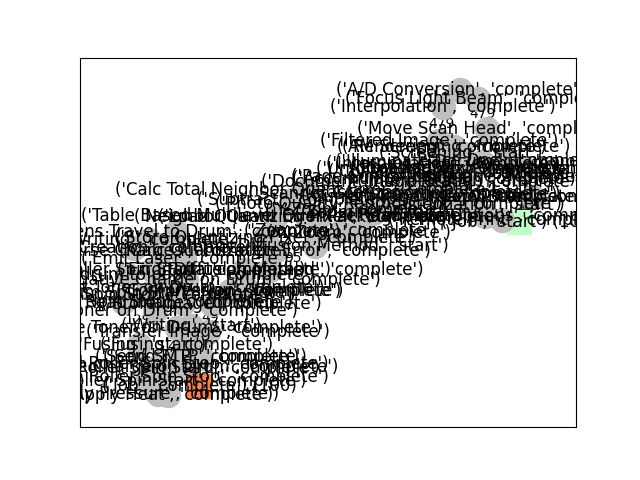

In [8]:
import maxes.analyze_sequence

graph = xes_generator.sequence_graph_

fig, ax = plt.subplots()
maxes.analyze_sequence.draw_nx_graph(graph, ax=ax, pos=nx.kamada_kawai_layout(graph), edge_label="frequency")

In [10]:
generated_log = xes_generator.generate()
generated_log.update_df()
generated_log.df

,concept:name,lifecycle:transition,time:timestamp
0,Job,start,1970-01-01 04:51:59.711076+00:00
1,Remote Print,complete,1970-01-01 16:41:58.665467+00:00
2,Read Print Options,complete,1970-01-01 17:05:59.072187+00:00
3,Rasterization,start,1970-01-01 17:10:57.632106+00:00
4,Interpretation,start,1970-01-01 17:20:57.762032+00:00
...,...,...,...
557,Pressure Roller Spin Stop,complete,1970-01-07 09:36:57.474926+00:00
558,Fusing,complete,1970-01-07 09:48:57.938416+00:00
559,Wipe Toner on Drum,complete,1970-01-07 10:04:58.050662+00:00
560,Erase Charge on Drum,complete,1970-01-07 10:27:57.762069+00:00


In [ ]:
file_path = get_file_path_by_key("env_permit_application_process", "data")
file_path

In [ ]:
AnalyzeXes.s_analyze(file_path)

In [17]:
log = XesLoader().load(file_path)
log.df

,org:group,concept:instance,org:resource,concept:name,time:timestamp,lifecycle:transition
0,Group 1,task-42933,Resource21,Confirmation of receipt,2011-10-11 11:45:40.276000+00:00,complete
1,Group 4,task-42935,Resource10,T02 Check confirmation of receipt,2011-10-12 06:26:25.398000+00:00,complete
2,Group 1,task-42957,Resource21,T03 Adjust confirmation of receipt,2011-11-24 14:36:51.302000+00:00,complete
3,Group 4,task-47958,Resource21,T02 Check confirmation of receipt,2011-11-24 14:37:16.553000+00:00,complete
0,EMPTY,task-43021,Resource30,Confirmation of receipt,2011-10-18 11:46:39.679000+00:00,complete
...,...,...,...,...,...,...
1,Group 4,task-43560,Resource06,T02 Check confirmation of receipt,2011-10-18 07:04:48.732000+00:00,complete
2,Group 3,task-43562,Resource06,T04 Determine confirmation of receipt,2011-10-18 07:05:12.359000+00:00,complete
3,Group 2,task-43563,Resource06,T05 Print and send confirmation of receipt,2011-10-18 07:05:30.196000+00:00,complete
4,Group 1,task-43561,Resource06,T06 Determine necessity of stop advice,2011-10-18 07:06:01.468000+00:00,complete


In [21]:
%autoreload
from maxes.generators.xes_generator.xes_generator3 import XesGenerator3

In [22]:
xes_generator = XesGenerator3()
xes_generator.fit(log)

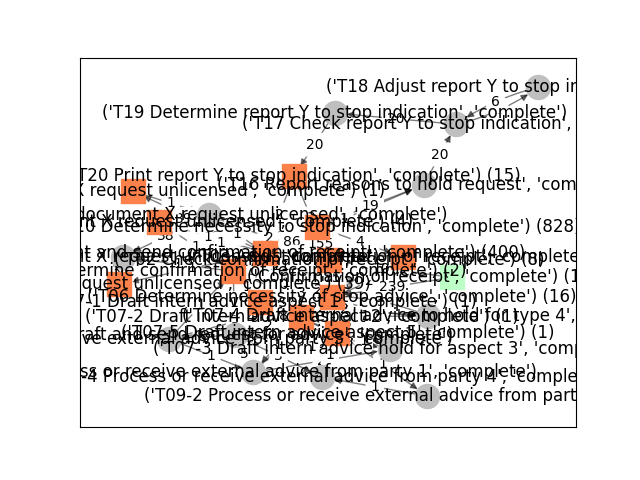

In [23]:
graph = xes_generator.sequence_graph_

fig, ax = plt.subplots()
maxes.analyze_sequence.draw_nx_graph(graph, ax=ax, pos=nx.kamada_kawai_layout(graph), edge_label="frequency")

In [ ]:
file_path = get_file_path_by_key("bpic2020", "request_for_payment")
print(file_path)
AnalyzeXes.s_analyze(file_path)

In [ ]:
file_path = get_file_path_by_key("ccc19", "data")
print(file_path)
AnalyzeXes.s_analyze(file_path)

TODO:

- env_permit_application_process
- lawsuits_brazil

In [ ]:
import maxes.notebooks.utils
import maxes.data.manifest_reader
import pm4py

logs = [
    # {
    #     "name": "env_permit_application_process_event_log",
    #     "path": maxes.data.manifest_reader.get_file_path("env_permit_application_process", "data"),
    # },
    {
        "name": "photo_copier_event_log",
        "path": maxes.data.manifest_reader.get_file_path("photo_copier", "event_log"),
    },
    {
        "name": "simple",
        "path": maxes.notebooks.utils.get_data_path("other/simple.xes"),
    },
    # {
    #     "name": "activities_edited_102",
    #     "path": maxes.notebooks.utils.get_data_path("Activities of daily living of several individuals_1_all/data/edited_hh102_labour.xes/edited_hh102_labour.xes"),
    # },
    {
        "name": "edited_hh104_labour",
        "path": maxes.notebooks.utils.get_data_path("Activities of daily living of several individuals_1_all/data/edited_hh104_labour.xes/edited_hh104_labour.xes"),
    },
    {
        "name": "ccc19",
        "path": maxes.data.manifest_reader.get_file_path("ccc19", "data"),
    },
    {
        "name": "software_data_analytics__alarm_system",
        "path": maxes.data.manifest_reader.get_file_path("software_data_analytics", "alarm_system"),
    },
    # {
    #     "name": "bpic2020__domestic_declarations",
    #     "path": maxes.data.manifest_reader.get_file_path("bpic2020", "domestic_declarations"),
    # },
    # {
    #     "name": "bpic2020__international_declarations",
    #     "path": maxes.data.manifest_reader.get_file_path("bpic2020", "international_declarations"),
    # },
    # {
    #     "name": "bpic2020__permit_log",
    #     "path": maxes.data.manifest_reader.get_file_path("bpic2020", "permit_log"),
    # },
    # {
    #     "name": "bpic2020__prepaid_travel_cost",
    #     "path": maxes.data.manifest_reader.get_file_path("bpic2020", "prepaid_travel_cost"),
    # },
    {
        "name": "bpic2020__request_for_payment",
        "path": maxes.data.manifest_reader.get_file_path("bpic2020", "request_for_payment"),
    },

    # {
    #     "name": "job_shop_scheduling__log_411",
    #     "path": maxes.data.manifest_reader.get_file_path("job_shop_scheduling", "log_411"),
    # },
    # {
    #     "name": "job_shop_scheduling__log_411",
    #     "path": maxes.data.manifest_reader.get_file_path("job_shop_scheduling", "log_411"),
    # }
]

for log_info in logs:
    print(log_info["path"])
    log_info["log"] = pm4py.read_xes(log_info["path"])

In [ ]:
[[log["name"], log["path"]] for log in logs]

In [ ]:
ccc19 = next((l for l in logs if l["name"] == "ccc19"))
ccc19["path"]
# ccc19["case:concept:name"].nunique()

In [31]:
# unique events per trace

env_permit_application_process_event_log.groupby("case:concept:name")["concept:name"].nunique() != env_permit_application_process_event_log.groupby("case:concept:name")["concept:name"].count()

case:concept:name
case-10011     True
case-10017     True
case-10024    False
case-10025    False
case-10028    False
              ...  
case-9970     False
case-9972     False
case-9981     False
case-9986     False
case-9997     False
Name: concept:name, Length: 1434, dtype: bool

In [22]:
x = [log["log"]["case:concept:name"].nunique() for log in logs]
print(x)

y = [log["log"].groupby("case:concept:name")["concept:name"].count().mean() for log in logs]
print(y)

[100, 3512, 43, 20, 5, 6886]
[np.float64(409.95), np.float64(13.137243735763098), np.float64(97.67441860465117), np.float64(69.7), np.float64(187.0), np.float64(5.343595701423178)]


In [17]:
%matplotlib inline

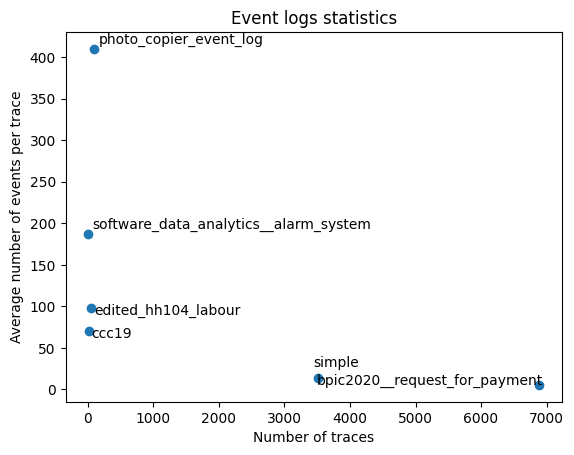

In [23]:
fig, ax = plt.subplots()

ax.scatter(x, y)

ax.set_title("Event logs statistics")
ax.set_xlabel("Number of traces")
ax.set_ylabel("Average number of events per trace")

texts = []
for i, log in enumerate(logs):
    # print(i, txt)
    text = ax.annotate(log["name"], (x[i], y[i]));
    texts.append(text)

adjustText.adjust_text(texts);